# Exploration of hepatitis dataset

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [185]:
# Define column names for the dataset from the hepatitis.names file
columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

data = pd.read_csv('data/hepatitis/hepatitis.data', sep=',', header=None, names=columns, quotechar='"')


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [187]:
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [188]:
# Check for missing values if they match to information on hepatitis.names
data.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [189]:
# Check for missing values marked with a question mark
data.apply(lambda x: (x == '?').sum())

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

We can approve, we have the same missing value count as in the dataset README

In [190]:
#Preprocess whole train dataset by replacing ? for None value for imputation reasons
data = data.replace('?', np.nan)
data.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

array([[<Axes: title={'center': 'Class'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'STEROID'}>],
       [<Axes: title={'center': 'ANTIVIRALS'}>,
        <Axes: title={'center': 'FATIGUE'}>,
        <Axes: title={'center': 'MALAISE'}>,
        <Axes: title={'center': 'ANOREXIA'}>],
       [<Axes: title={'center': 'LIVER BIG'}>,
        <Axes: title={'center': 'LIVER FIRM'}>,
        <Axes: title={'center': 'SPLEEN PALPABLE'}>,
        <Axes: title={'center': 'SPIDERS'}>],
       [<Axes: title={'center': 'ASCITES'}>,
        <Axes: title={'center': 'VARICES'}>,
        <Axes: title={'center': 'BILIRUBIN'}>,
        <Axes: title={'center': 'ALK PHOSPHATE'}>],
       [<Axes: title={'center': 'SGOT'}>,
        <Axes: title={'center': 'ALBUMIN'}>,
        <Axes: title={'center': 'PROTIME'}>,
        <Axes: title={'center': 'HISTOLOGY'}>]], dtype=object)

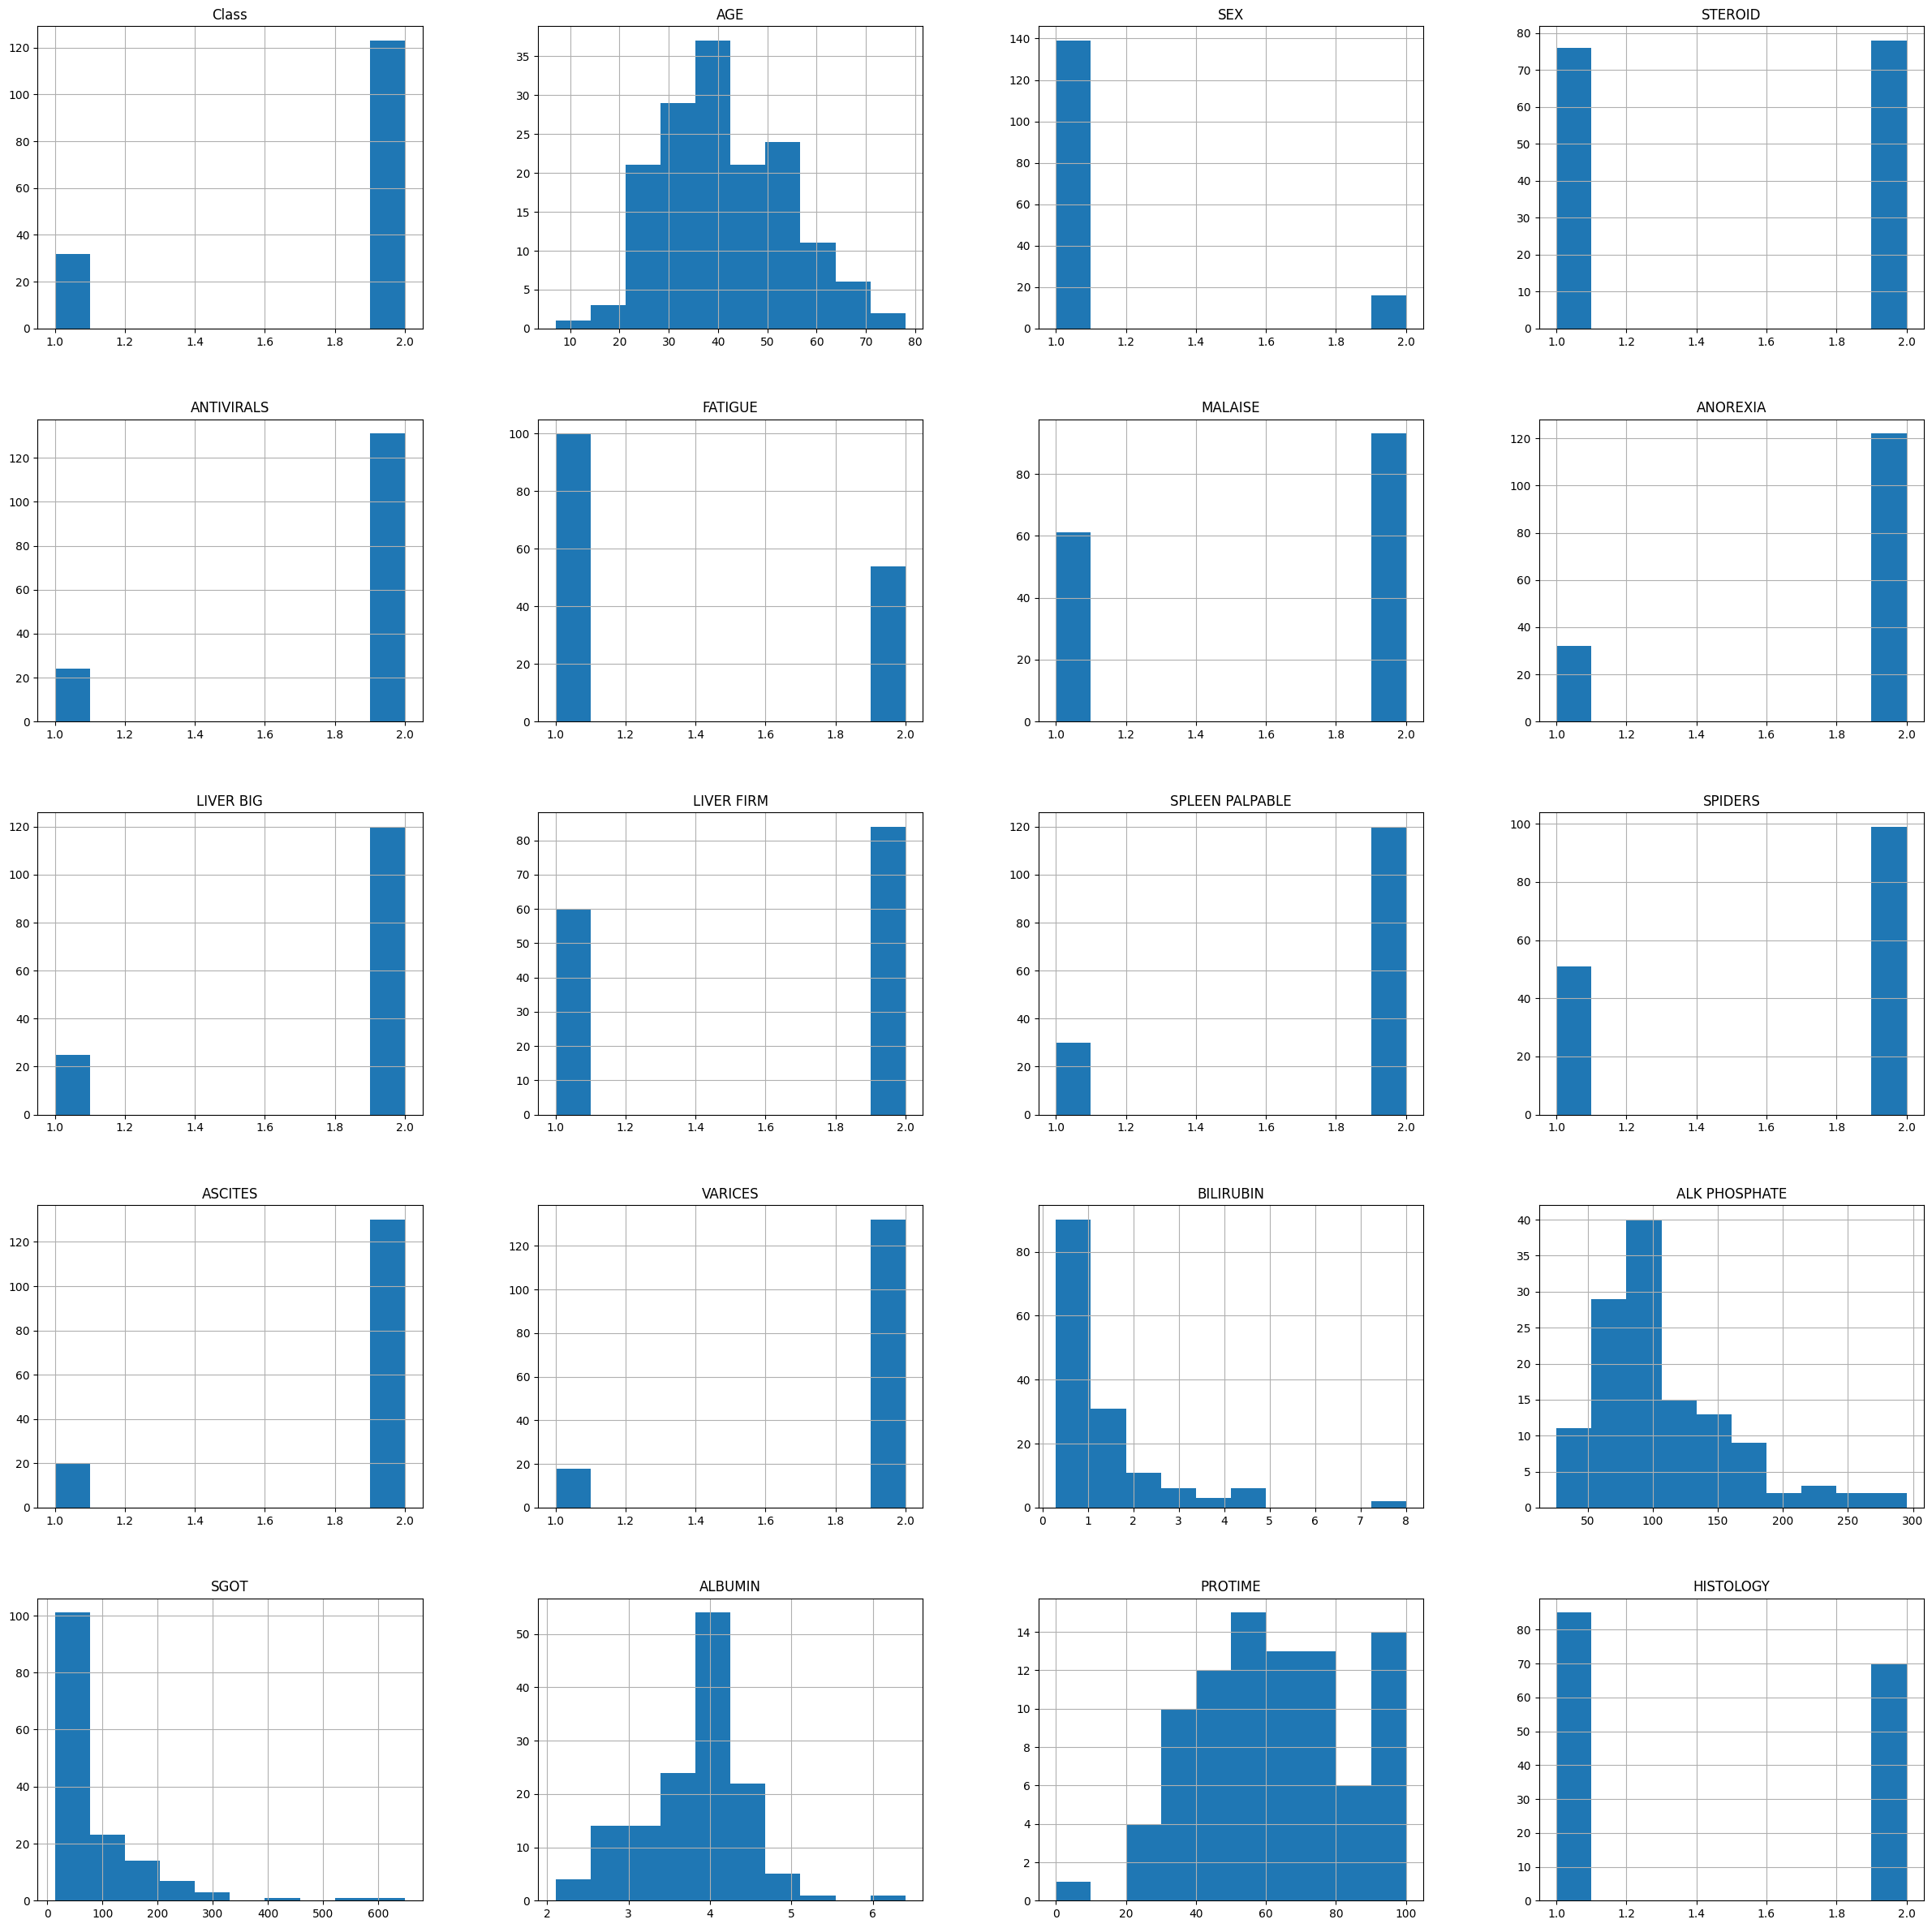

In [191]:
for series_name, series in data.items():
    data[series_name] = pd.to_numeric(series)
data.hist(figsize=(30,30))

This outputs only the five columns not containing any missing values.

In [192]:
data.shape

(155, 20)

In [193]:
data.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [194]:
data = data.replace('?', None)

In [195]:
data[data.isna().any(axis=1)]

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2,20,1,1.0,2,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,0.9,89.0,152.0,4.0,NaN,2
149,2,36,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.6,120.0,30.0,4.0,NaN,2
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2


In [196]:
nan_list = data.isna().sum(axis=1).tolist()
[i for i in nan_list if i > 2]

[5, 4, 4, 5, 7, 4, 14, 7, 5, 4, 4, 3, 3, 3, 7, 4, 6]

There are multiple rows containing one or two missing values but ony a few having more than 2 missing values.

In [197]:
print(sum(nan_list))

167


In total, there are 167 missing values in the dataset.

In [198]:
data.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [199]:
data.Class.value_counts()

Class
2    123
1     32
Name: count, dtype: int64

This is important to remember, that there is quite an imbalance in the target class.

In [200]:
data.dtypes

Class                int64
AGE                  int64
SEX                  int64
STEROID            float64
ANTIVIRALS           int64
FATIGUE            float64
MALAISE            float64
ANOREXIA           float64
LIVER BIG          float64
LIVER FIRM         float64
SPLEEN PALPABLE    float64
SPIDERS            float64
ASCITES            float64
VARICES            float64
BILIRUBIN          float64
ALK PHOSPHATE      float64
SGOT               float64
ALBUMIN            float64
PROTIME            float64
HISTOLOGY            int64
dtype: object

# Heatmap for feature selection

<Axes: >

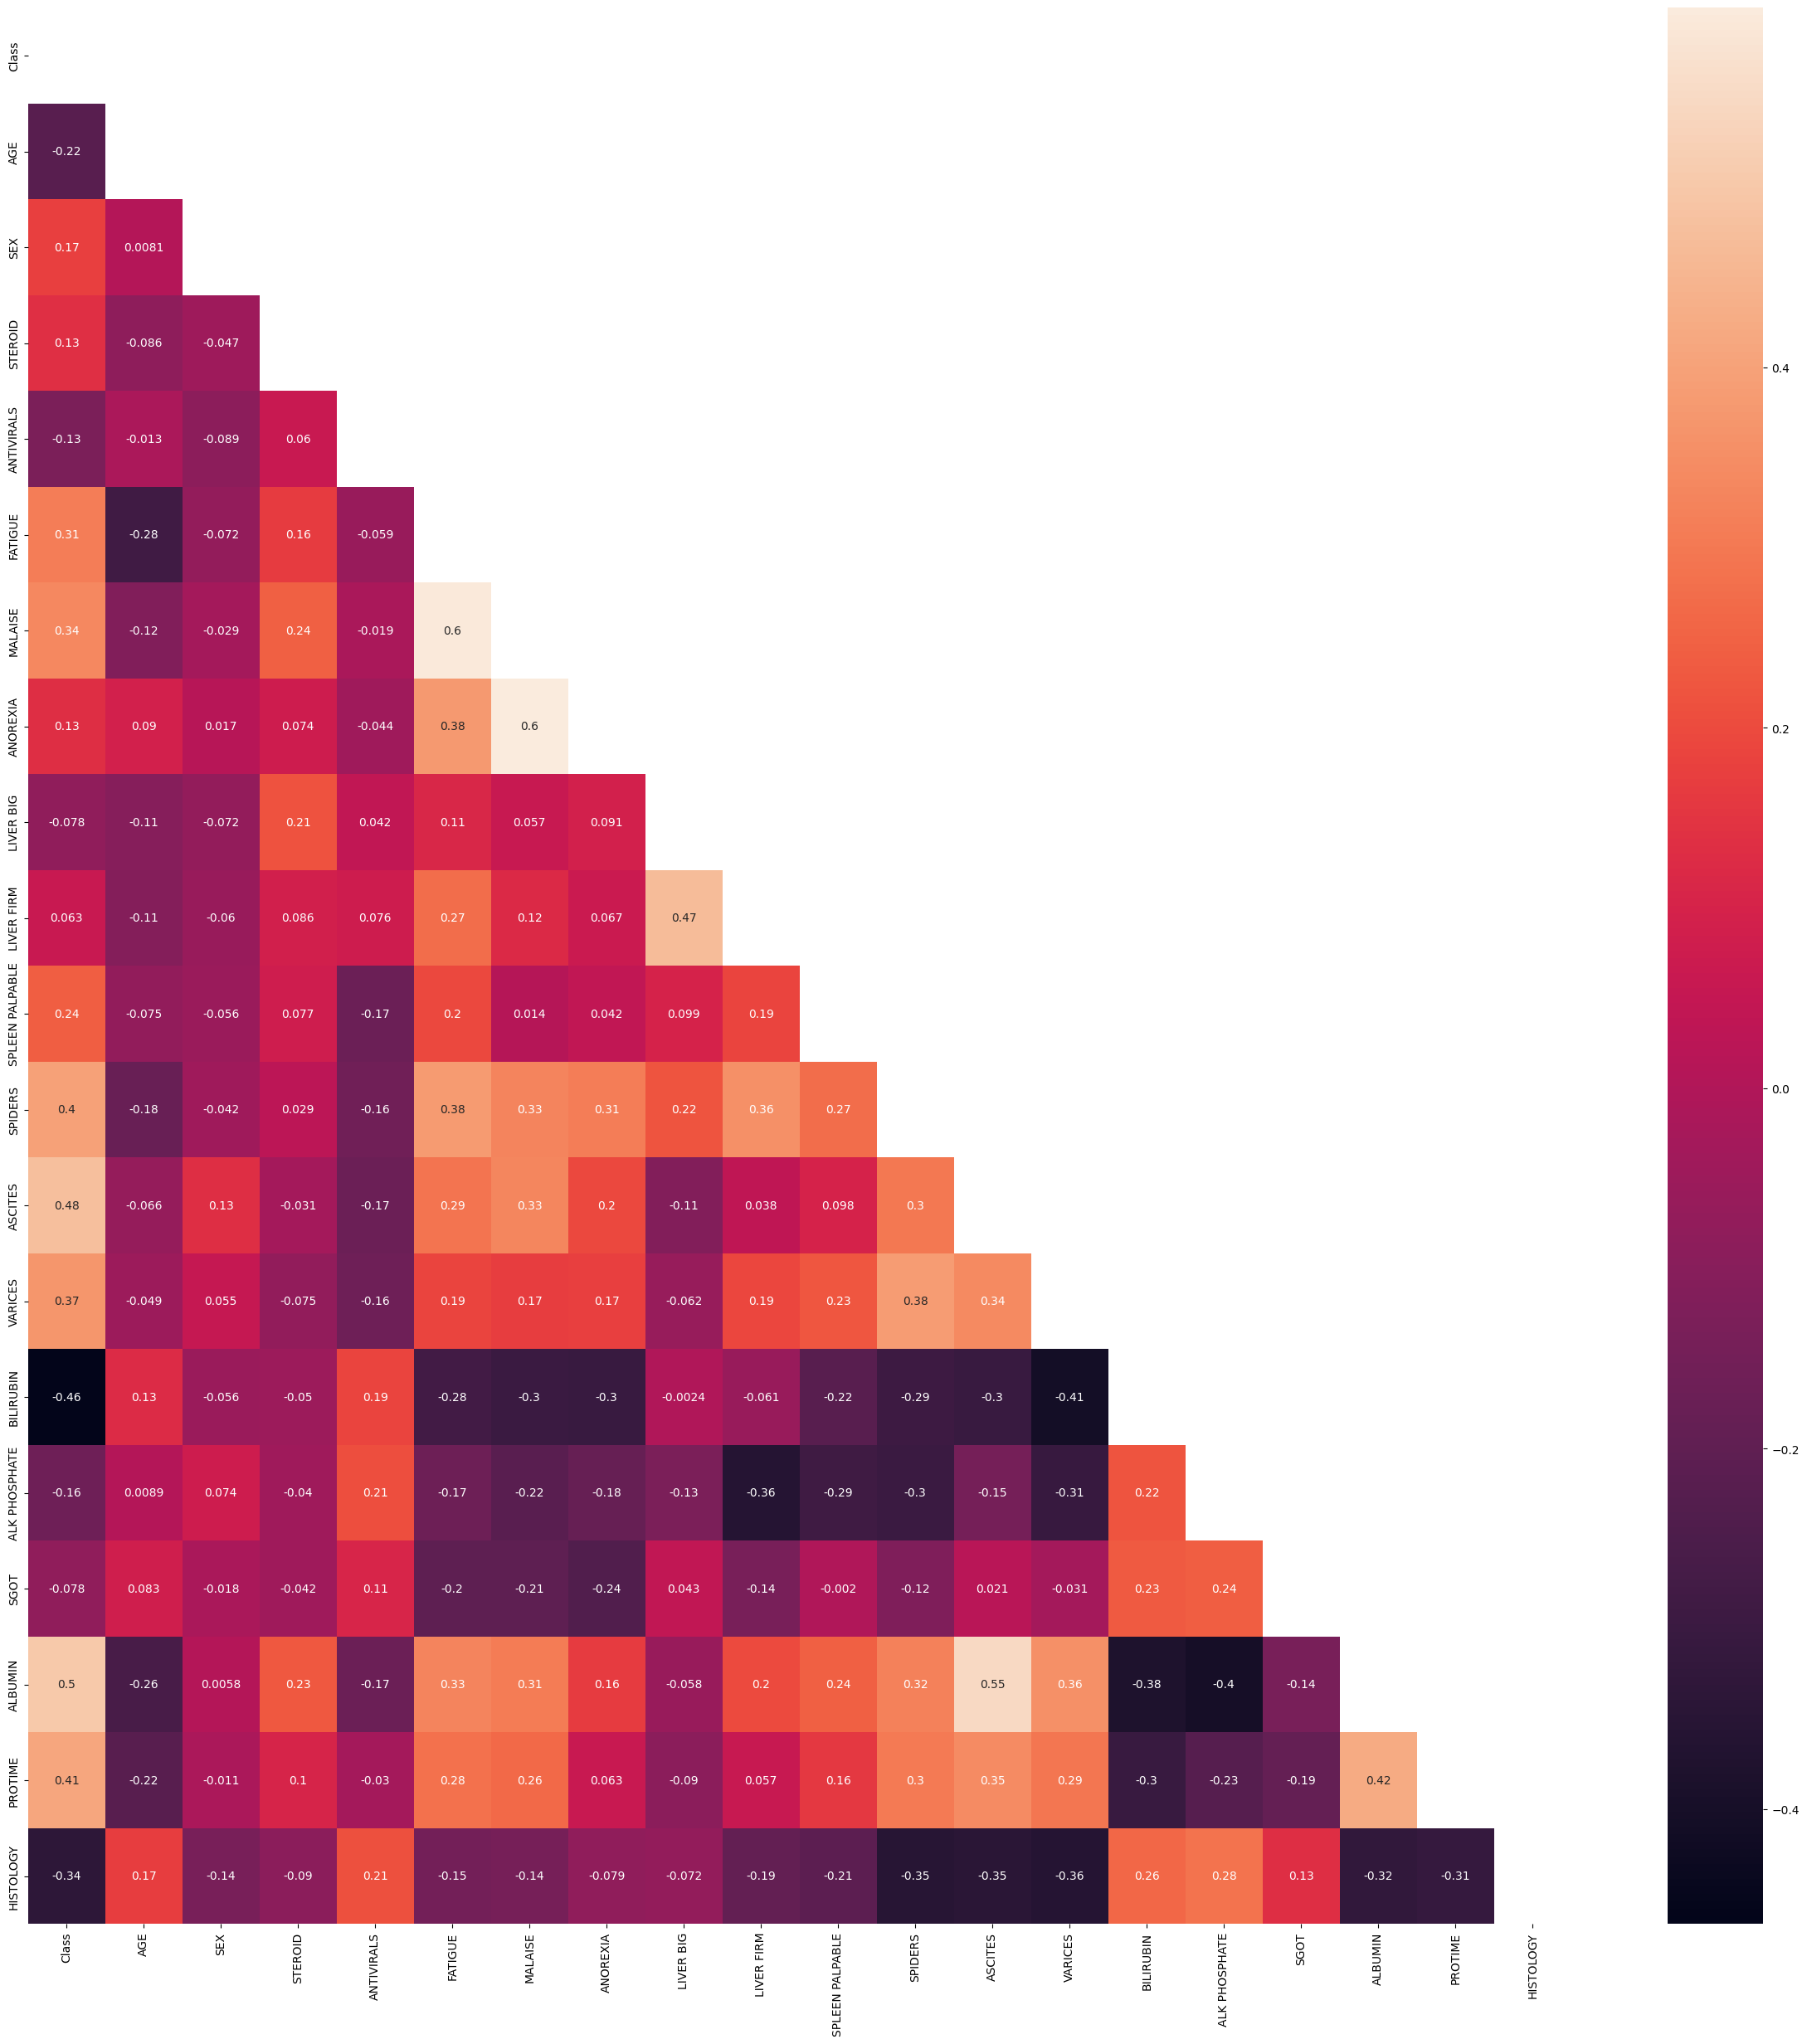

In [201]:
corr = data.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
plt.figure(figsize=(30, 30))
# using the upper triangle matrix as mask 
sns.heatmap(corr, mask=matrix, annot=True, xticklabels=True, yticklabels=True)

Our main interest are the high correlations of the target class. If we consider only correlations higher than 0.4 or lower than -0.4, we get the following classes for feature selection:
- SPIDERS
- ASCITES
- BILIRUBIN
- ALBUMIN
- PROTIME

In [202]:
data = data[['SPIDERS', 'ASCITES', 'BILIRUBIN', 'ALBUMIN', 'PROTIME']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SPIDERS    150 non-null    float64
 1   ASCITES    150 non-null    float64
 2   BILIRUBIN  149 non-null    float64
 3   ALBUMIN    139 non-null    float64
 4   PROTIME    88 non-null     float64
dtypes: float64(5)
memory usage: 6.2 KB


In [203]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Define column names for the dataset from the hepatitis.names file
columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

data = pd.read_csv('data/hepatitis/hepatitis.data', sep=',', header=None, names=columns, quotechar='"')

#Preprocess whole train dataset by replacing ? for None value for imputation reasons
data = data.replace('?', np.nan)

# Split up the column names into numerical and categorical attributes 
colnames_numerical = ["Class", "AGE", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME"]

colnames_categorical = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 
            'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']

# Impute missing values
cat_impute_pipe = make_pipeline(SimpleImputer(strategy='most_frequent', missing_values=np.nan))
num_impute_pipe = make_pipeline(SimpleImputer(strategy='median', missing_values=np.nan))

impute = ColumnTransformer(
    transformers=[
        ("impute_categories", cat_impute_pipe, colnames_categorical),
        ("impute_numerics", num_impute_pipe, colnames_numerical),
    ]
)

# Impute both train sets before inserting to model to prevent error for models not able to handle NaNs
imputed_data = pd.DataFrame(impute.fit_transform(data))

In [204]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       155 non-null    object
 1   1       155 non-null    object
 2   2       155 non-null    object
 3   3       155 non-null    object
 4   4       155 non-null    object
 5   5       155 non-null    object
 6   6       155 non-null    object
 7   7       155 non-null    object
 8   8       155 non-null    object
 9   9       155 non-null    object
 10  10      155 non-null    object
 11  11      155 non-null    object
 12  12      155 non-null    object
 13  13      155 non-null    object
 14  14      155 non-null    object
 15  15      155 non-null    object
 16  16      155 non-null    object
 17  17      155 non-null    object
 18  18      155 non-null    object
 19  19      155 non-null    object
dtypes: object(20)
memory usage: 24.3+ KB


In [205]:
imputed_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,1,2,2,2,2,1,2,2,2,2,2,1,2.0,30.0,1.0,85.0,18.0,4.0,61.0
1,1,1,2,1,2,2,1,2,2,2,2,2,1,2.0,50.0,0.9,135.0,42.0,3.5,61.0
2,1,2,2,1,2,2,2,2,2,2,2,2,1,2.0,78.0,0.7,96.0,32.0,4.0,61.0
3,1,2,1,2,2,2,2,2,2,2,2,2,1,2.0,31.0,0.7,46.0,52.0,4.0,80.0
4,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,34.0,1.0,85.0,200.0,4.0,61.0


In [206]:
for series_name, series in imputed_data.items():
    imputed_data[series_name] = pd.to_numeric(series)

In [207]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       155 non-null    int64  
 1   1       155 non-null    int64  
 2   2       155 non-null    int64  
 3   3       155 non-null    int64  
 4   4       155 non-null    int64  
 5   5       155 non-null    int64  
 6   6       155 non-null    int64  
 7   7       155 non-null    int64  
 8   8       155 non-null    int64  
 9   9       155 non-null    int64  
 10  10      155 non-null    int64  
 11  11      155 non-null    int64  
 12  12      155 non-null    int64  
 13  13      155 non-null    float64
 14  14      155 non-null    float64
 15  15      155 non-null    float64
 16  16      155 non-null    float64
 17  17      155 non-null    float64
 18  18      155 non-null    float64
 19  19      155 non-null    float64
dtypes: float64(7), int64(13)
memory usage: 24.3 KB


In [208]:
imputed_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,1,2,2,2,2,1,2,2,2,2,2,1,2.0,30.0,1.0,85.0,18.0,4.0,61.0
1,1,1,2,1,2,2,1,2,2,2,2,2,1,2.0,50.0,0.9,135.0,42.0,3.5,61.0
2,1,2,2,1,2,2,2,2,2,2,2,2,1,2.0,78.0,0.7,96.0,32.0,4.0,61.0
3,1,2,1,2,2,2,2,2,2,2,2,2,1,2.0,31.0,0.7,46.0,52.0,4.0,80.0
4,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,34.0,1.0,85.0,200.0,4.0,61.0


In [209]:
columns = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY', "Class", "AGE", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME"]
columns_dict = {}
for i in range(len(columns)):
    columns_dict.update({i:columns[i]})

In [210]:
columns_dict

{0: 'SEX',
 1: 'STEROID',
 2: 'ANTIVIRALS',
 3: 'FATIGUE',
 4: 'MALAISE',
 5: 'ANOREXIA',
 6: 'LIVER BIG',
 7: 'LIVER FIRM',
 8: 'SPLEEN PALPABLE',
 9: 'SPIDERS',
 10: 'ASCITES',
 11: 'VARICES',
 12: 'HISTOLOGY',
 13: 'Class',
 14: 'AGE',
 15: 'BILIRUBIN',
 16: 'ALK PHOSPHATE',
 17: 'SGOT',
 18: 'ALBUMIN',
 19: 'PROTIME'}

In [211]:
# Rename columns to names instead of digits
imputed_data = imputed_data.rename(columns=columns_dict)
imputed_data.head()

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY,Class,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME
0,2,1,2,2,2,2,1,2,2,2,2,2,1,2.0,30.0,1.0,85.0,18.0,4.0,61.0
1,1,1,2,1,2,2,1,2,2,2,2,2,1,2.0,50.0,0.9,135.0,42.0,3.5,61.0
2,1,2,2,1,2,2,2,2,2,2,2,2,1,2.0,78.0,0.7,96.0,32.0,4.0,61.0
3,1,2,1,2,2,2,2,2,2,2,2,2,1,2.0,31.0,0.7,46.0,52.0,4.0,80.0
4,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,34.0,1.0,85.0,200.0,4.0,61.0


In [212]:
# Reorder columns
imputed_data = imputed_data[['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']]
imputed_data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2.0,30.0,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,61.0,1
1,2.0,50.0,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,61.0,1
2,2.0,78.0,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,61.0,1
3,2.0,31.0,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2.0,34.0,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.0,200.0,4.0,61.0,1


array([[<Axes: title={'center': 'Class'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'STEROID'}>],
       [<Axes: title={'center': 'ANTIVIRALS'}>,
        <Axes: title={'center': 'FATIGUE'}>,
        <Axes: title={'center': 'MALAISE'}>,
        <Axes: title={'center': 'ANOREXIA'}>],
       [<Axes: title={'center': 'LIVER BIG'}>,
        <Axes: title={'center': 'LIVER FIRM'}>,
        <Axes: title={'center': 'SPLEEN PALPABLE'}>,
        <Axes: title={'center': 'SPIDERS'}>],
       [<Axes: title={'center': 'ASCITES'}>,
        <Axes: title={'center': 'VARICES'}>,
        <Axes: title={'center': 'BILIRUBIN'}>,
        <Axes: title={'center': 'ALK PHOSPHATE'}>],
       [<Axes: title={'center': 'SGOT'}>,
        <Axes: title={'center': 'ALBUMIN'}>,
        <Axes: title={'center': 'PROTIME'}>,
        <Axes: title={'center': 'HISTOLOGY'}>]], dtype=object)

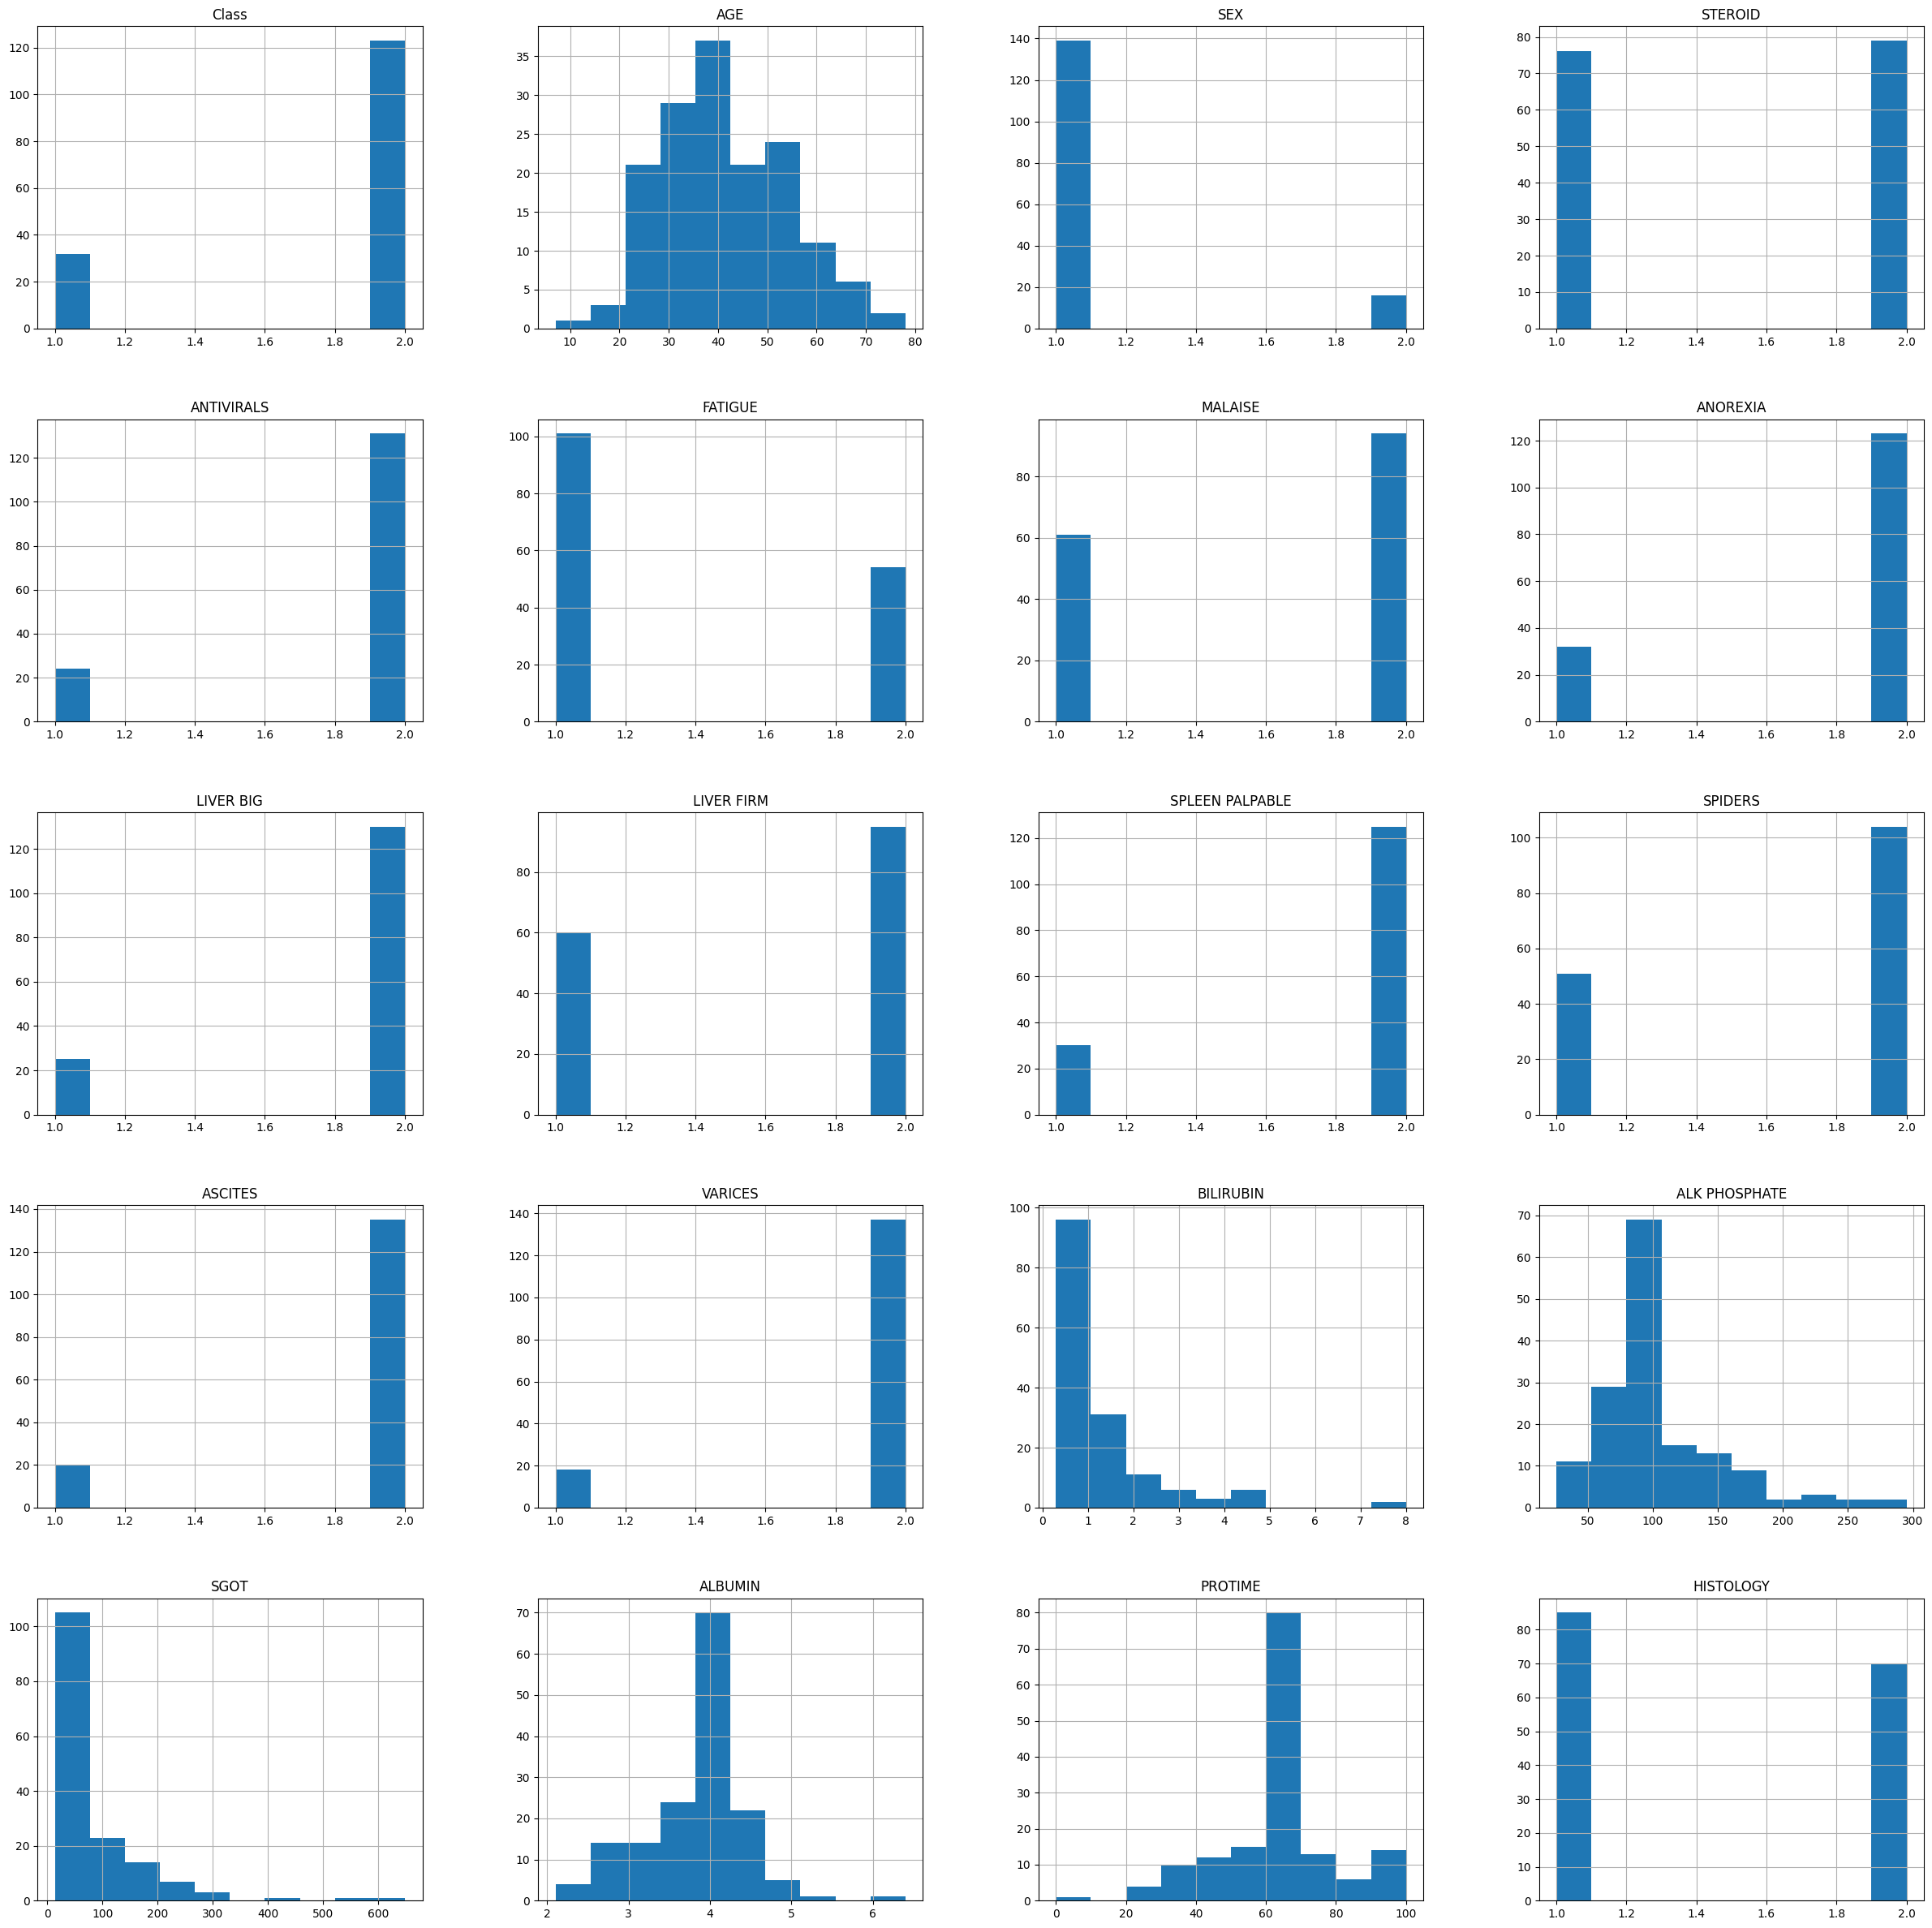

In [213]:
imputed_data.hist(figsize=(30,30))